In [50]:
# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
# import dataset
wine_df = pd.read_csv('../resources/winequalityN.csv')
wine_df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [29]:
# find al null values
wine_df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [30]:
# drop all NA values
wine_df = wine_df.dropna()

In [32]:
wine_df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [53]:
# group by type of wine
wine_grouped = wine_df.groupby(["type"]).count()["quality"]
wine_grouped


type
red      1593
white    4870
Name: quality, dtype: int64

In [48]:
# get keys for wine_grouped
wine_types = wine_grouped.keys()

In [51]:
# get values for wine_grouped
wine_type_counts = wine_grouped.values

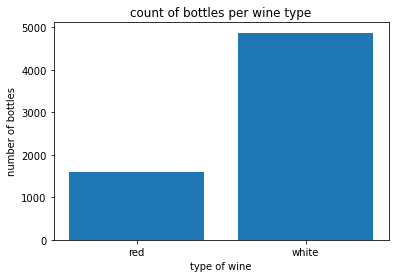

In [52]:
plt.bar(wine_types, wine_type_counts)
plt.title('count of bottles per wine type')
plt.xlabel('type of wine')
plt.ylabel('number of bottles')
plt.show()